In [1]:
import numpy as np
import pandas as pd
import re
import string
from collections import Counter

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 

# Maybe try Gensim for LDA
import gensim.corpora as corpora
import gensim.matutils as matutils
from gensim.models import LdaModel, Nmf, CoherenceModel

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import dill
import pickle

In [14]:
# This code is based on https://rjh336.github.io/projects/craigslist/

def cluster_plot(tsne_data, no_topics):

    color_map = sns.color_palette("tab10", 15)
    labels = list(range(no_topics))

    plt.figure(figsize=(15, 10))
    for topic in range(no_topics):
        inds = np.where(tsne_data[:, 2] == topic)[0]
        plt.scatter(x=tsne_data[inds, 0],
                    y=tsne_data[inds, 1],
                    marker='o',
                    s=5,
                    color=color_map[topic],
                    label=topic_labels[topic])

    plt.title('Cluster Evaluation of the Topics via t-SNE', fontsize=16)
    plt.xlabel('Dim 1', fontsize=12)
    plt.ylabel('Dim 2', fontsize=12)
    plt.legend(loc="lower right", fontsize=12)
    plt.tight_layout()
    plt.savefig('tsne_plot.png')
    plt.show()

# A separate notebook for topic clustering analysis

In [23]:
with open('tfidf', 'rb') as f:
    tfidf = dill.load(f)
    
with open('x_tfidf', 'rb') as f:
    x_tfidf = dill.load(f)
    


In [24]:
with open('recipe_model_2', 'rb') as f:
    recipe_model = dill.load(f)

In [25]:
recipe_model_transform = recipe_model.transform(x_tfidf)

In [26]:
threshold = 0.040
_idx = np.amax(recipe_model_transform, axis=1) > threshold
recipe_model_transform_filtered = recipe_model_transform[_idx]

In [27]:
recipe_model_transform_filtered.shape

(167090, 11)

In [28]:
recipe_model_transform_scaled = StandardScaler().fit_transform(recipe_model_transform_filtered)

In [29]:
tsne = TSNE(n_components=2, perplexity=50, random_state=123, init='pca', verbose=5 )
topics_map_2d = tsne.fit_transform(recipe_model_transform_scaled)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 167090 samples in 41.009s...
[t-SNE] Computed neighbors for 167090 samples in 207.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 167090
[t-SNE] Computed conditional probabilities for sample 2000 / 167090
[t-SNE] Computed conditional probabilities for sample 3000 / 167090
[t-SNE] Computed conditional probabilities for sample 4000 / 167090
[t-SNE] Computed conditional probabilities for sample 5000 / 167090
[t-SNE] Computed conditional probabilities for sample 6000 / 167090
[t-SNE] Computed conditional probabilities for sample 7000 / 167090
[t-SNE] Computed conditional probabilities for sample 8000 / 167090
[t-SNE] Computed conditional probabilities for sample 9000 / 167090
[t-SNE] Computed conditional probabilities for sample 10000 / 167090
[t-SNE] Computed conditional probabilities for sample 11000 / 167090
[t-SNE] Computed conditional probabilities for sample 12000 / 167090
[t-SNE] Computed conditional pro

In [19]:
with open('tsne_model_004_trhes', 'wb') as f:
    dill.dump(topics_map_2d, f)

In [8]:
with open('topic_map_example', 'wb') as f:
    dill.dump(topics_map_2d, f)

In [3]:
with open('tsne_model_004_trhes', 'rb') as f:
    topics_map_2d = dill.load(f)

In [30]:
max_topic_per_post = []
for i in range(recipe_model_transform_filtered.shape[0]):
    max_topic_per_post += recipe_model_transform_filtered[i].argmax(),

In [31]:
max_topic_per_post = [[x] for x in max_topic_per_post]
tsne_data = np.concatenate((topics_map_2d, max_topic_per_post), 1)

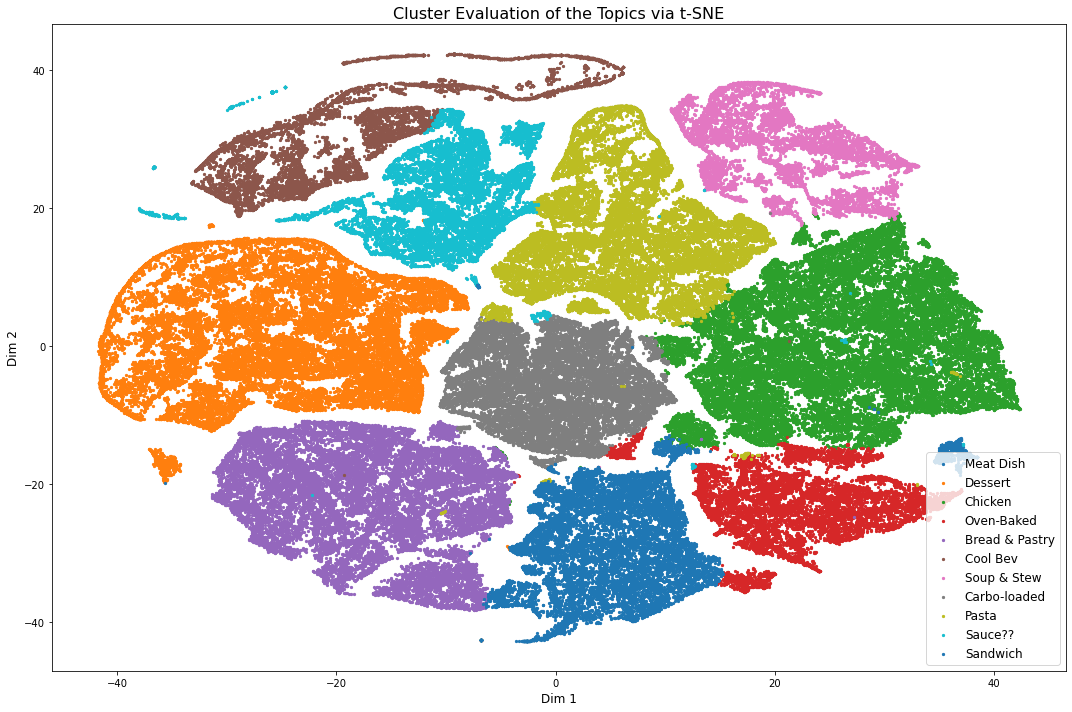

In [32]:
topic_labels = ['Meat Dish', 'Dessert', 'Chicken', 'Oven-Baked', 'Bread & Pastry', 'Cool Bev', 'Soup & Stew', 'Carbo-loaded', 'Pasta', 'Sauce??', 'Sandwich']

cluster_plot(tsne_data, 11)

So, the topics are relatively well separated and groupd together. One caveat, though, is that this result is from filtering out a huge portion of the data (due to the process time).<br>
